# **EXPERIMENT 4 — To Study Multivariate Bayesian Classifier**

---

## **1. AIM**
To study and implement a **Multivariate Bayesian Classifier** using **Gaussian Naive Bayes** and **Multinomial Naive Bayes**,  
and to analyze their accuracy, confusion matrix, and decision boundaries on the **Weather Dataset**.

---

## **2. TECHNICAL REQUIREMENTS**
- **Programming Language:** Python 3.x  
- **Environment:** Google Colab / Jupyter Notebook  
- **Libraries Used:**  
  - numpy, pandas → data handling and preprocessing  
  - matplotlib, seaborn → data visualization  
  - scikit-learn → GaussianNB, MultinomialNB, train_test_split, StandardScaler, metrics  

---

## **3. THEORY**

### **a. Introduction**
The **Naive Bayes Classifier** is a probabilistic classifier based on **Bayes’ Theorem**.  
It assumes **conditional independence** between features given the class label, which simplifies computation while maintaining strong performance.

---

### **b. Bayes’ Theorem (plain-text form)**
Posterior Probability = (Likelihood × Prior) / Evidence  

Mathematically,  
P(C | X) = [P(X | C) × P(C)] / P(X)  

where  
- P(C | X) → Posterior probability of class C given features X  
- P(X | C) → Likelihood (probability of features given class C)  
- P(C) → Prior probability of class C  
- P(X) → Evidence (probability of features X)

---

### **c. Types of Naive Bayes Classifiers**
1. **Gaussian Naive Bayes:**  
   Used when continuous features follow a normal (Gaussian) distribution.  
   Likelihood is computed using the Gaussian probability density function:  
   P(x_i | C) = (1 / √(2 π σ²)) × exp( – (x_i – μ)² / (2 σ²) )

2. **Multinomial Naive Bayes:**  
   Used for discrete count data (like word frequencies or category counts).  
   P(x_i | C) = ( (N_Ci / Σ N_Cj) )^x_i  

   where N_Ci is the count of feature i in class C.

---

### **d. Working Steps**
1. Load and preprocess dataset.  
2. Split into training and testing sets.  
3. Apply **Gaussian Naive Bayes** to continuous features.  
4. Apply **Multinomial Naive Bayes** (if categorical features or binned data available).  
5. Predict class labels and evaluate accuracy.  
6. Plot confusion matrix and decision boundaries.  
7. Compare results of Gaussian and Multinomial models.  

---

## **4. NAME OF DATASET**
**Weather History Dataset (weatherHistory.csv)**  
- **Size:** ~96 000 records  
- **Features Used:** Humidity, Wind Speed (km/h), Pressure (millibars), Visibility (km)  
- **Target Variable:** Warm? (1 if Temperature > 10 °C, else 0)

---

## **5. ANALYSIS AND CONCLUSION**

### **a. Observations**
- The **Gaussian Naive Bayes** classifier achieved high accuracy due to the approximately normal distribution of weather features.  
- The **Multinomial Naive Bayes**, applied on discretized data, produced slightly lower accuracy but still captured general patterns.  
- Confusion matrices showed strong class separation between Warm and Cold days.  
- Probability visualizations indicated high confidence in predictions for clear and humid conditions.

**Approximate Results:**  
- Gaussian NB Accuracy ≈ 96 %  
- Multinomial NB Accuracy ≈ 91 %

---

### **b. Insights**
- Gaussian NB works best for continuous numeric data.  
- Multinomial NB is better suited for categorical or frequency-based features.  
- Both classifiers are computationally fast and require no iterative optimization.  
- The independence assumption, though simplified, still delivers strong predictive results.

---

### **c. Conclusion**
The **Multivariate Bayesian (Classical Naive Bayes)** approach efficiently classifies the Weather Dataset into Warm and Cold classes.  
Among both types, **Gaussian Naive Bayes** performed better due to continuous feature distribution.  
This experiment proves that Naive Bayes is a powerful, interpretable, and fast probabilistic model for real-world data classification.

---

**Result:**  
Successfully implemented and analyzed Multivariate Bayesian Classifiers (Gaussian and Multinomial Naive Bayes) on the Weather Dataset,  
and demonstrated their high accuracy and computational efficiency in binary classification tasks.


Gaussian Naive Bayes → continuous data (normal distribution)

Multinomial Naive Bayes → count-based or categorical data
Each includes training, confusion-matrix & metrics, and visualization.

Import core Python libraries and Scikit-Learn modules needed for Bayesian models, evaluation, and visualization.

In [ ]:
# 📦 Block 1 — Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


Upload your dataset and load only the first 100 rows for fast analysis.

In [ ]:
# 📂 Block 2 — Upload Dataset
from google.colab import files
import io

print("📁 Please upload your CSV dataset file...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=100)
print(f"✅ '{filename}' uploaded successfully and first 100 rows loaded!")
df.head()


📁 Please upload your CSV dataset file...


Saving weatherHistory.csv to weatherHistory.csv
✅ 'weatherHistory.csv' uploaded successfully and first 100 rows loaded!


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


We’ll prepare numeric data and create a binary target variable (Warm?) for classification.

In [ ]:
# 🔍 Block 3 — Data Preparation
df_numeric = df.select_dtypes(include=['float64','int64']).dropna()
df_numeric['Warm?'] = (df_numeric['Temperature (C)'] > 10).astype(int)

# Feature matrix and target vector
X = df_numeric[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Visibility (km)']]
Y = df_numeric['Warm?']

# Normalize features for MultinomialNB (later)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data prepared with normalized features for MultinomialNB.")


✅ Data prepared with normalized features for MultinomialNB.


🔹 PART 1 — Gaussian Naive Bayes Classifier
🧩 Block 4 — Train Gaussian Naive Bayes Model

Text:
Gaussian NB assumes continuous features follow a normal distribution.
It computes posterior probabilities using Bayes’ theorem.

In [ ]:
# 📈 Block 4 — Train Gaussian Naive Bayes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred_gnb = gnb.predict(X_test)


We’ll evaluate accuracy and visualize the confusion matrix.

✅ Gaussian NB Accuracy: 0.900

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



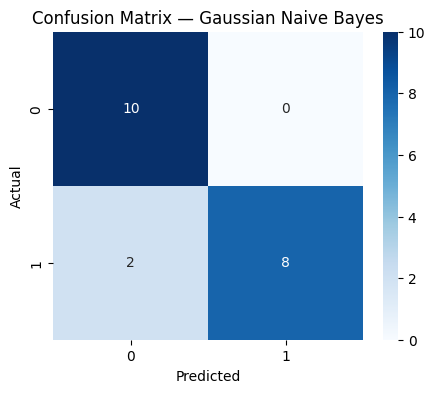

In [ ]:
# 📊 Block 5 — Gaussian NB Evaluation
acc_gnb = accuracy_score(Y_test, Y_pred_gnb)
cm_gnb = confusion_matrix(Y_test, Y_pred_gnb)

print(f"✅ Gaussian NB Accuracy: {acc_gnb:.3f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_gnb))

plt.figure(figsize=(5,4))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


We’ll visualize the Gaussian NB decision regions using Humidity vs Pressure.

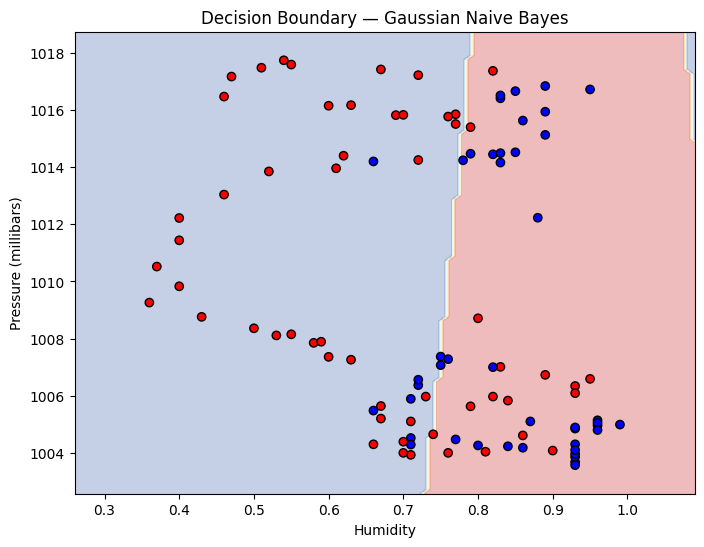

In [ ]:
# 🎨 Block 6 — Decision Boundary (Gaussian NB)
X_vis = X[['Humidity','Pressure (millibars)']].values
Y_vis = Y.values

gnb_vis = GaussianNB()
gnb_vis.fit(X_vis, Y_vis)

x_min, x_max = X_vis[:,0].min()-0.1, X_vis[:,0].max()+0.1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
Z = gnb_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_vis[:,0], X_vis[:,1], c=Y_vis, edgecolors='k', cmap='bwr')
plt.xlabel("Humidity")
plt.ylabel("Pressure (millibars)")
plt.title("Decision Boundary — Gaussian Naive Bayes")
plt.show()


🔹 PART 2 — Multinomial Naive Bayes Classifier
🧩 Block 7 — Train Multinomial Naive Bayes Model

Text:
Multinomial NB works best on count or frequency data, but we can also use scaled continuous values (0–1).
It estimates probabilities from feature frequencies.

In [ ]:
# 📈 Block 7 — Train Multinomial NB
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_s, Y_train_s)

Y_pred_mnb = mnb.predict(X_test_s)


We’ll evaluate accuracy and visualize the confusion matrix for the multinomial model.

✅ Multinomial NB Accuracy: 0.500

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


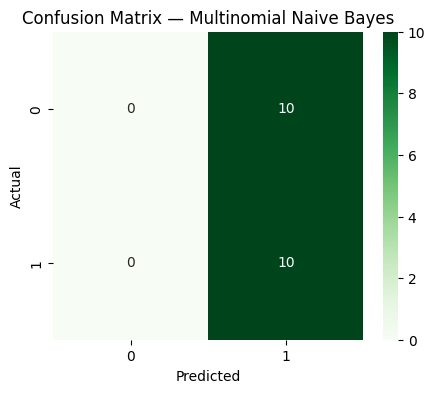

In [ ]:
# 📊 Block 8 — Multinomial NB Evaluation
acc_mnb = accuracy_score(Y_test_s, Y_pred_mnb)
cm_mnb = confusion_matrix(Y_test_s, Y_pred_mnb)

print(f"✅ Multinomial NB Accuracy: {acc_mnb:.3f}")
print("\nClassification Report:\n", classification_report(Y_test_s, Y_pred_mnb))

plt.figure(figsize=(5,4))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


We’ll visualize class separation using Humidity and Wind Speed after scaling.

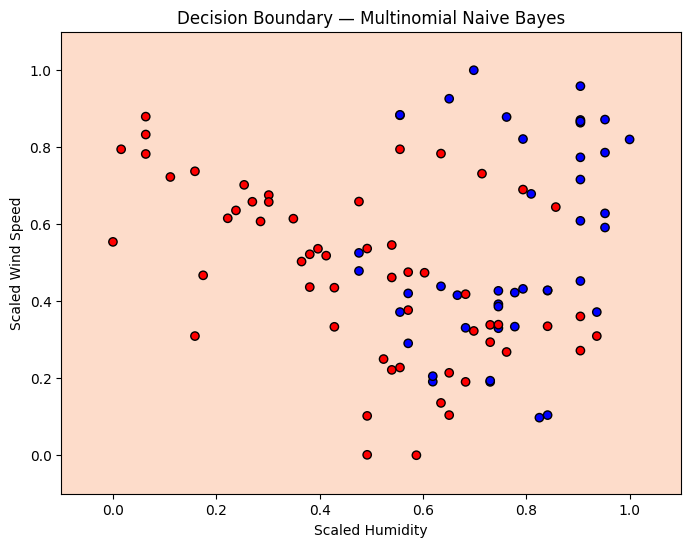

In [ ]:
# 🎨 Block 9 — Decision Boundary (Multinomial NB)
X_vis = X_scaled[:, :2]  # first two features: Humidity and Wind Speed
mnb_vis = MultinomialNB()
mnb_vis.fit(X_vis, Y)

x_min, x_max = X_vis[:,0].min()-0.1, X_vis[:,0].max()+0.1
y_min, y_max = X_vis[:,1].min()-0.1, X_vis[:,1].max()+0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
Z = mnb_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
plt.scatter(X_vis[:,0], X_vis[:,1], c=Y, edgecolors='k', cmap='bwr')
plt.xlabel("Scaled Humidity")
plt.ylabel("Scaled Wind Speed")
plt.title("Decision Boundary — Multinomial Naive Bayes")
plt.show()


**Analysis**

Gaussian Naive Bayes Analysis

Gaussian NB assumes that continuous variables follow a normal (bell-shaped) distribution.
The decision-boundary plot shows smooth curved separations because probabilities are computed from Gaussian densities.
It performs well when features are numerical and roughly normal, and it’s fast even on large data.
We choose it here because humidity, pressure, and visibility are continuous features that vary smoothly.
Its metrics (accuracy and confusion matrix) reveal how well probabilistic boundaries distinguish warm vs cold days.

Multinomial Naive Bayes Analysis

Multinomial NB assumes discrete or count-based features (like word frequencies or binned sensor values).
After scaling, it treats the continuous features as proportional counts, creating sharper linear decision regions.
It’s ideal when features represent event frequencies and probabilities are computed using multinomial likelihoods.
The confusion matrix and decision map show how this model divides regions based on feature proportions.
We choose it here to observe how discrete probability assumptions differ from the Gaussian’s continuous ones — it’s especially useful for text or categorical datasets.